# Adware Multiclass Classification

The dataset contains the records of 5 different types of Adware and Benign samples 
that have been recorded during the network scanning operation. 
The data contains 276095 records with 85 features. 

The observations by features are as follows:
- BENIGN Data with 167304 Observations
- ADWARE EWIND Data with 24406 Observations 
- ADWARE KEMOGE Data with 23359 Observations
- ADWARE DOWGIN Data with 22533 Observations 
- ADWARE MOBIDASH Data with 19497 Observations
- ADWARE SHUANET Data with 18996 Observations

### Results

1. Decision Tree - 0.9923
2. Decision Tree with Bagging - 0.9943
3. XGBoost - 0.9933
4. Random Forest - 0.9694
5. AdaBoost - 0.6928   - Meant for binary classification, that explains the peculiar result. Do not include in final.
6. KNN - 0.8015

In [24]:
# Library Imports
from collections import Counter
import pandas as pd
import numpy as np
import hashlib
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import tree, metrics, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import BaggingClassifier
from lightgbm import LGBMClassifier

### Data Analysis

In [25]:
data = pd.read_csv('Adware_Multiclass_Classification.csv').drop(columns=['Unnamed: 0'], )
data

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,172.217.6.237-10.42.0.42-443-35084-6,172.217.6.237,443,10.42.0.42,35084,6,02/07/2017 06:19:46,8457,1,3,...,32,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
1,205.204.101.182-10.42.0.211-443-36459-6,205.204.101.182,443,10.42.0.211,36459,6,14/06/2017 02:35:03,10449,2,1,...,20,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,ADWARE_MOBIDASH
2,182.22.25.124-10.42.0.211-443-38105-6,10.42.0.211,38105,182.22.25.124,443,6,14/06/2017 08:05:54,2634535,3,0,...,32,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,ADWARE_MOBIDASH
3,131.253.61.68-10.42.0.151-443-33915-6,10.42.0.151,33915,131.253.61.68,443,6,05/07/2017 11:09:46,4480,3,0,...,20,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
4,172.217.2.174-10.42.0.151-443-38069-6,172.217.2.174,443,10.42.0.151,38069,6,13/06/2017 06:26:02,65297,1,1,...,32,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,ADWARE_EWIND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276090,10.42.0.211-10.42.0.1-1556-53-17,10.42.0.211,1556,10.42.0.1,53,17,14/06/2017 12:21:54,51314,1,1,...,32,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,ADWARE_MOBIDASH
276091,239.255.255.250-10.42.0.1-1900-49154-17,10.42.0.1,49154,239.255.255.250,1900,17,13/06/2017 04:28:19,3004127,4,0,...,32,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,ADWARE_KEMOGE
276092,10.42.0.151-10.42.0.1-1149-53-17,10.42.0.151,1149,10.42.0.1,53,17,13/06/2017 06:29:29,141060,1,1,...,20,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,ADWARE_EWIND
276093,156.154.200.36-10.42.0.211-443-51191-6,10.42.0.211,51191,156.154.200.36,443,6,14/06/2017 05:18:47,460889,9,10,...,32,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,ADWARE_MOBIDASH


In [26]:
data.head(10) #For 10 rows

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,172.217.6.237-10.42.0.42-443-35084-6,172.217.6.237,443,10.42.0.42,35084,6,02/07/2017 06:19:46,8457,1,3,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,205.204.101.182-10.42.0.211-443-36459-6,205.204.101.182,443,10.42.0.211,36459,6,14/06/2017 02:35:03,10449,2,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_MOBIDASH
2,182.22.25.124-10.42.0.211-443-38105-6,10.42.0.211,38105,182.22.25.124,443,6,14/06/2017 08:05:54,2634535,3,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_MOBIDASH
3,131.253.61.68-10.42.0.151-443-33915-6,10.42.0.151,33915,131.253.61.68,443,6,05/07/2017 11:09:46,4480,3,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,172.217.2.174-10.42.0.151-443-38069-6,172.217.2.174,443,10.42.0.151,38069,6,13/06/2017 06:26:02,65297,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_EWIND
5,10.42.0.211-106.39.169.66-54098-443-6,10.42.0.211,54098,106.39.169.66,443,6,14/06/2017 04:05:58,17307739,4,2,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_MOBIDASH
6,172.217.2.163-10.42.0.211-80-36512-6,10.42.0.211,36512,172.217.2.163,80,6,14/06/2017 05:17:50,85489,4,3,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_MOBIDASH
7,10.42.0.211-103.235.47.88-57425-80-6,10.42.0.211,57425,103.235.47.88,80,6,14/06/2017 07:14:24,189266,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_DOWGIN
8,172.217.10.42-10.42.0.42-443-56531-6,10.42.0.42,56531,172.217.10.42,443,6,02/07/2017 09:03:13,360192,11,8,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
9,203.205.158.63-10.42.0.42-80-45201-6,10.42.0.42,45201,203.205.158.63,80,6,03/07/2017 12:03:48,13571550,2,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [27]:
data.tail() #Last 5

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
276090,10.42.0.211-10.42.0.1-1556-53-17,10.42.0.211,1556,10.42.0.1,53,17,14/06/2017 12:21:54,51314,1,1,...,32,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,ADWARE_MOBIDASH
276091,239.255.255.250-10.42.0.1-1900-49154-17,10.42.0.1,49154,239.255.255.250,1900,17,13/06/2017 04:28:19,3004127,4,0,...,32,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,ADWARE_KEMOGE
276092,10.42.0.151-10.42.0.1-1149-53-17,10.42.0.151,1149,10.42.0.1,53,17,13/06/2017 06:29:29,141060,1,1,...,20,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,ADWARE_EWIND
276093,156.154.200.36-10.42.0.211-443-51191-6,10.42.0.211,51191,156.154.200.36,443,6,14/06/2017 05:18:47,460889,9,10,...,32,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,ADWARE_MOBIDASH
276094,169.53.71.244-10.42.0.211-443-48404-6,10.42.0.211,48404,169.53.71.244,443,6,05/07/2017 06:28:38,110068708,16,12,...,32,1632979.0,2.125491e+06,3135928.0,130030.0,53341039.0,5.259243e+07,90529503.0,16152575.0,BENIGN


In [28]:
data.describe()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,276095.000000,276095.000000,276095.000000,2.760950e+05,276095.000000,276095.000000,2.760950e+05,2.760950e+05,276095.000000,276095.000000,...,276095.000000,2.760950e+05,2.760950e+05,2.760950e+05,2.760950e+05,2.760950e+05,2.760950e+05,2.760950e+05,2.760950e+05,2.760950e+05
mean,38956.497763,5467.306688,8.461511,1.081044e+07,6.775211,10.012659,7.561441e+02,1.053465e+04,210.037360,12.522266,...,1.645452,-2.523693e+04,1.330748e+05,1.910040e+04,1.517145e+05,1.183610e+05,3.883987e+06,2.795727e+05,4.126309e+06,3.665575e+06
std,18367.120729,14771.412851,4.656345,2.151609e+07,39.356488,121.748188,1.221647e+04,1.737599e+05,372.852601,55.058143,...,10.491204,5.936716e+06,7.695242e+05,2.714005e+05,8.983619e+05,7.271824e+05,1.438763e+07,2.667350e+06,1.501760e+07,1.408056e+07
min,0.000000,0.000000,0.000000,1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,-1.395063e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,34123.500000,80.000000,6.000000,4.921300e+04,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,43399.000000,443.000000,6.000000,5.164570e+05,2.000000,1.000000,3.100000e+01,2.600000e+01,31.000000,0.000000,...,0.000000,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,52573.000000,443.000000,6.000000,1.062121e+07,5.000000,4.000000,3.930000e+02,3.260000e+02,274.000000,27.000000,...,1.000000,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65534.000000,65165.000000,17.000000,1.199991e+08,8421.000000,13540.000000,5.724944e+06,1.960192e+07,1460.000000,1460.000000,...,3954.000000,6.000000e+01,4.320783e+07,3.147178e+07,6.778153e+07,4.320783e+07,1.197947e+08,7.370595e+07,1.197947e+08,1.197947e+08


Types of data
- Binary data : A binary variable a variable that has only 2 values..ie 0/1
- Categorical data : A categorical variable is a variable that can take some limited number of values.for example,day of the week.It can be one of 1,2,3,4,5,6,7 only.
- Ordinal data : An ordinal variable is a categorical variable that has some order associated with it.for example,the ratings that are given to a movie by a user.
- Nominal data : Nominal value is a variable that has no numerical importance,such as occupation,person name etc..
- Timeseries data : Time series data has a temporal value attached to it, so this would be something like a date or a time stamp that you can look for trends in time.

In [29]:
pd.isna(data).sum()

Flow ID             0
Source IP           0
Source Port         0
Destination IP      0
Destination Port    0
                   ..
Idle Mean           0
 Idle Std           0
 Idle Max           0
 Idle Min           0
Class               0
Length: 85, dtype: int64

In [30]:
data["Class"].nunique()

6

In [31]:
data["Class"].unique()  # Classes

array(['BENIGN', 'ADWARE_MOBIDASH', 'ADWARE_EWIND', 'ADWARE_DOWGIN',
       'ADWARE_SHUANET', 'ADWARE_KEMOGE'], dtype=object)

In [32]:
data["Class"].value_counts() # Counts of each value.

BENIGN             167304
ADWARE_EWIND        24406
ADWARE_KEMOGE       23359
ADWARE_DOWGIN       22533
ADWARE_MOBIDASH     19497
ADWARE_SHUANET      18996
Name: Class, dtype: int64

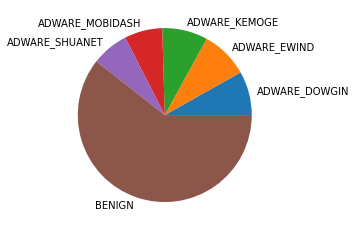

In [33]:
pie_dataset = data.groupby('Class').size().reset_index(name = 'Counts')
plt.pie(pie_dataset['Counts'], labels = pie_dataset['Class']) #, radius = 5, textprops={'fontsize': 20})
plt.show()

C:\Users\marat\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

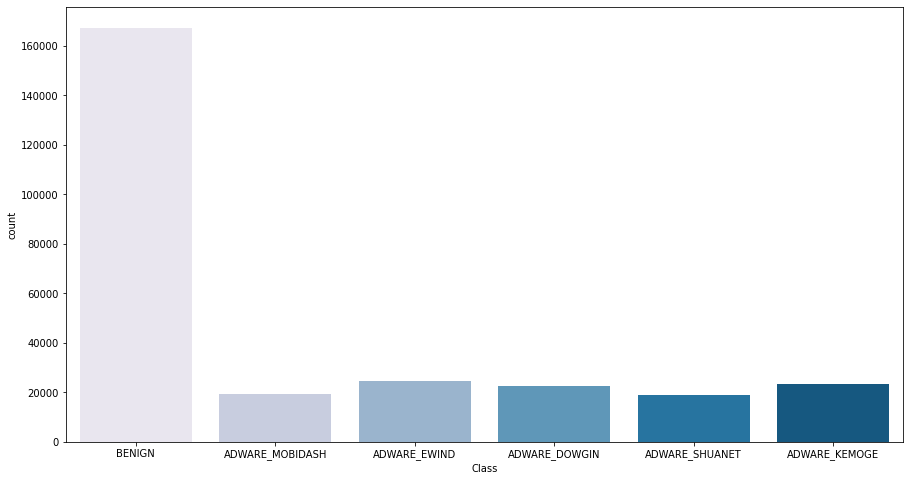

In [34]:
plt.figure(figsize=(15,8))
sns.countplot(data["Class"], palette="PuBu")

In [35]:
data.groupby('Class').mean()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Class,,,,,,,,,,,,,,,,,,,,,
ADWARE_DOWGIN,39789.372476,4892.010695,8.116629,9.993922e+06,6.747126,9.551635,551.149203,10385.031909,197.585896,12.391337,...,1.342875,25.685395,157639.466921,22914.672533,182070.949896,138722.038921,3.085275e+06,246626.930480,3.322069e+06,2.893299e+06
ADWARE_EWIND,39348.940015,5362.927559,8.579038,1.196197e+07,7.014013,7.791813,575.443538,7440.477137,213.891051,12.547775,...,1.512374,26.701385,128878.493239,13913.957426,139986.851061,119252.070761,4.419478e+06,235882.172765,4.608384e+06,4.236957e+06
ADWARE_KEMOGE,38322.069866,5402.823751,9.519115,8.565706e+06,5.292179,7.040070,484.226551,6955.748619,179.130314,16.762404,...,1.080654,29.163706,220256.713432,14490.408236,235491.979494,208583.849994,3.334411e+06,292520.602279,3.597067e+06,3.104249e+06
ADWARE_MOBIDASH,39343.523773,5261.954557,8.434221,9.776649e+06,6.916756,10.575012,585.902703,11491.052162,203.276658,14.120377,...,1.431913,26.502744,171602.567859,24624.241284,197976.526491,150978.430476,3.947854e+06,373782.726191,4.279049e+06,3.659000e+06
ADWARE_SHUANET,39145.986471,5206.980680,8.684670,1.248059e+07,7.756054,9.485049,567.050379,9749.347284,215.339756,14.394978,...,1.575279,27.032796,150634.336574,22464.576422,172349.241946,133078.382291,4.730077e+06,255335.979767,4.963932e+06,4.524193e+06
BENIGN,38809.036353,5622.507890,8.320997,1.099668e+07,6.823357,10.808128,889.388174,11483.573280,215.653260,11.545301,...,1.817327,-41665.065850,111722.464498,18961.218860,129905.629680,97419.713480,3.886666e+06,280348.643135,4.125289e+06,3.667884e+06


In [36]:
data.drop_duplicates()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,172.217.6.237-10.42.0.42-443-35084-6,172.217.6.237,443,10.42.0.42,35084,6,02/07/2017 06:19:46,8457,1,3,...,32,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
1,205.204.101.182-10.42.0.211-443-36459-6,205.204.101.182,443,10.42.0.211,36459,6,14/06/2017 02:35:03,10449,2,1,...,20,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,ADWARE_MOBIDASH
2,182.22.25.124-10.42.0.211-443-38105-6,10.42.0.211,38105,182.22.25.124,443,6,14/06/2017 08:05:54,2634535,3,0,...,32,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,ADWARE_MOBIDASH
3,131.253.61.68-10.42.0.151-443-33915-6,10.42.0.151,33915,131.253.61.68,443,6,05/07/2017 11:09:46,4480,3,0,...,20,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
4,172.217.2.174-10.42.0.151-443-38069-6,172.217.2.174,443,10.42.0.151,38069,6,13/06/2017 06:26:02,65297,1,1,...,32,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,ADWARE_EWIND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276090,10.42.0.211-10.42.0.1-1556-53-17,10.42.0.211,1556,10.42.0.1,53,17,14/06/2017 12:21:54,51314,1,1,...,32,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,ADWARE_MOBIDASH
276091,239.255.255.250-10.42.0.1-1900-49154-17,10.42.0.1,49154,239.255.255.250,1900,17,13/06/2017 04:28:19,3004127,4,0,...,32,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,ADWARE_KEMOGE
276092,10.42.0.151-10.42.0.1-1149-53-17,10.42.0.151,1149,10.42.0.1,53,17,13/06/2017 06:29:29,141060,1,1,...,20,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,ADWARE_EWIND
276093,156.154.200.36-10.42.0.211-443-51191-6,10.42.0.211,51191,156.154.200.36,443,6,14/06/2017 05:18:47,460889,9,10,...,32,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,ADWARE_MOBIDASH


### One Hot Encoder

Encoding each category as a one hot encoding (OHE) vector (or dummy variables). OHE is a representation method that takes each category value and turns it into a binary vector of size |i|(number of values in category i) where all columns are equal to zero besides the category column.

In [37]:
# # We have many columns with Object dtype; let's apply one-hot encoding
# # (if the number of unique values is relatively small)
# # or hashing if there are many uniques
# cols_to_drop = []
# len_data = len(data)

# for col in data.drop(columns=['Class']).columns:
#   if data[col].dtype == 'object':
#     print(f'Column {col} has {data[col].nunique()} values among {len_data}')

#     if data[col].nunique() < 25:
#       print(f'One-hot encoding of {col}')
#       one_hot_cols = pd.get_dummies(data[col])
#       for ohc in one_hot_cols.columns:
#         data[col + '_' + ohc] = one_hot_cols[ohc]
#     else:
#       print(f'Hashing of {col}')
#       data[col + '_hash'] = data[col].apply(lambda row: int(hashlib.sha1((col + "_" + str(row)).encode('utf-8')).hexdigest(), 16) % len_data)

#     cols_to_drop.append(col)

In [38]:
# # Dropping non-hashed versions of columns from previous step
# data = data.drop(columns=cols_to_drop)

In [39]:
# # The target variable (Class) has 6 unique string values,
# # let's represent them with numerical labels
# class_nums = {}
# i = 0
# for cl in data.Class.unique():
#     class_nums[cl] = i
#     i += 1

# data['Class_num'] = [class_nums[cl] for cl in data.Class.values]
# data = data.drop(columns=['Class'])
# data

In [40]:
# corr = data.drop(columns=["Class_num"]).corr()
# corr_top = corr.abs().unstack().sort_values(kind='quicksort')
# corr_top = corr_top[corr_top > 0.7][corr_top < 1]

# cols_to_drop = [corr_top.index[i][0] for i in range(0, len(corr_top), 2)]
# print(f"Highly correlated features: {cols_to_drop}")
# data = data.drop(columns=cols_to_drop)

# data

In [41]:
# x = data.drop("Class_num", axis = 1) # axis = 1 removes column and axis = 0 removes row from dataset
# y = data["Class_num"]
# x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.85,test_size = 0.15)


### Label Encoder

In this method we change every categorical data to a number.That is each type will be subtuted by a number.

Eg: 1 for Grandmaster,2 for master ,3 for expert etc.. 


In [42]:
# Encoding class labels manually so that we know what code is assigned to which class
for idx,value in enumerate(data["Class"]):
    if value == "BENIGN":
        data["Class"][idx] = 0
    elif value == "ADWARE_EWIND":
        data["Class"][idx] = 1
    elif value == "ADWARE_KEMOGE":
        data["Class"][idx] = 2
    elif value == "ADWARE_DOWGIN":
        data["Class"][idx] = 3
    elif value == "ADWARE_MOBIDASH":
        data["Class"][idx] = 4
    elif value == "ADWARE_SHUANET":
        data["Class"][idx] = 5


C:\Users\marat\AppData\Local\Temp\ipykernel_6920\1210025025.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Class"][idx] = 0
C:\Users\marat\AppData\Local\Temp\ipykernel_6920\1210025025.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Class"][idx] = 4
C:\Users\marat\AppData\Local\Temp\ipykernel_6920\1210025025.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Class"][idx] = 1
C:\Users\marat\AppData\Local\Temp

In [43]:
label=LabelEncoder()
for col in  data.columns:
    if(data[col].dtype=='object'):
        data[col]=label.fit_transform(data[col])

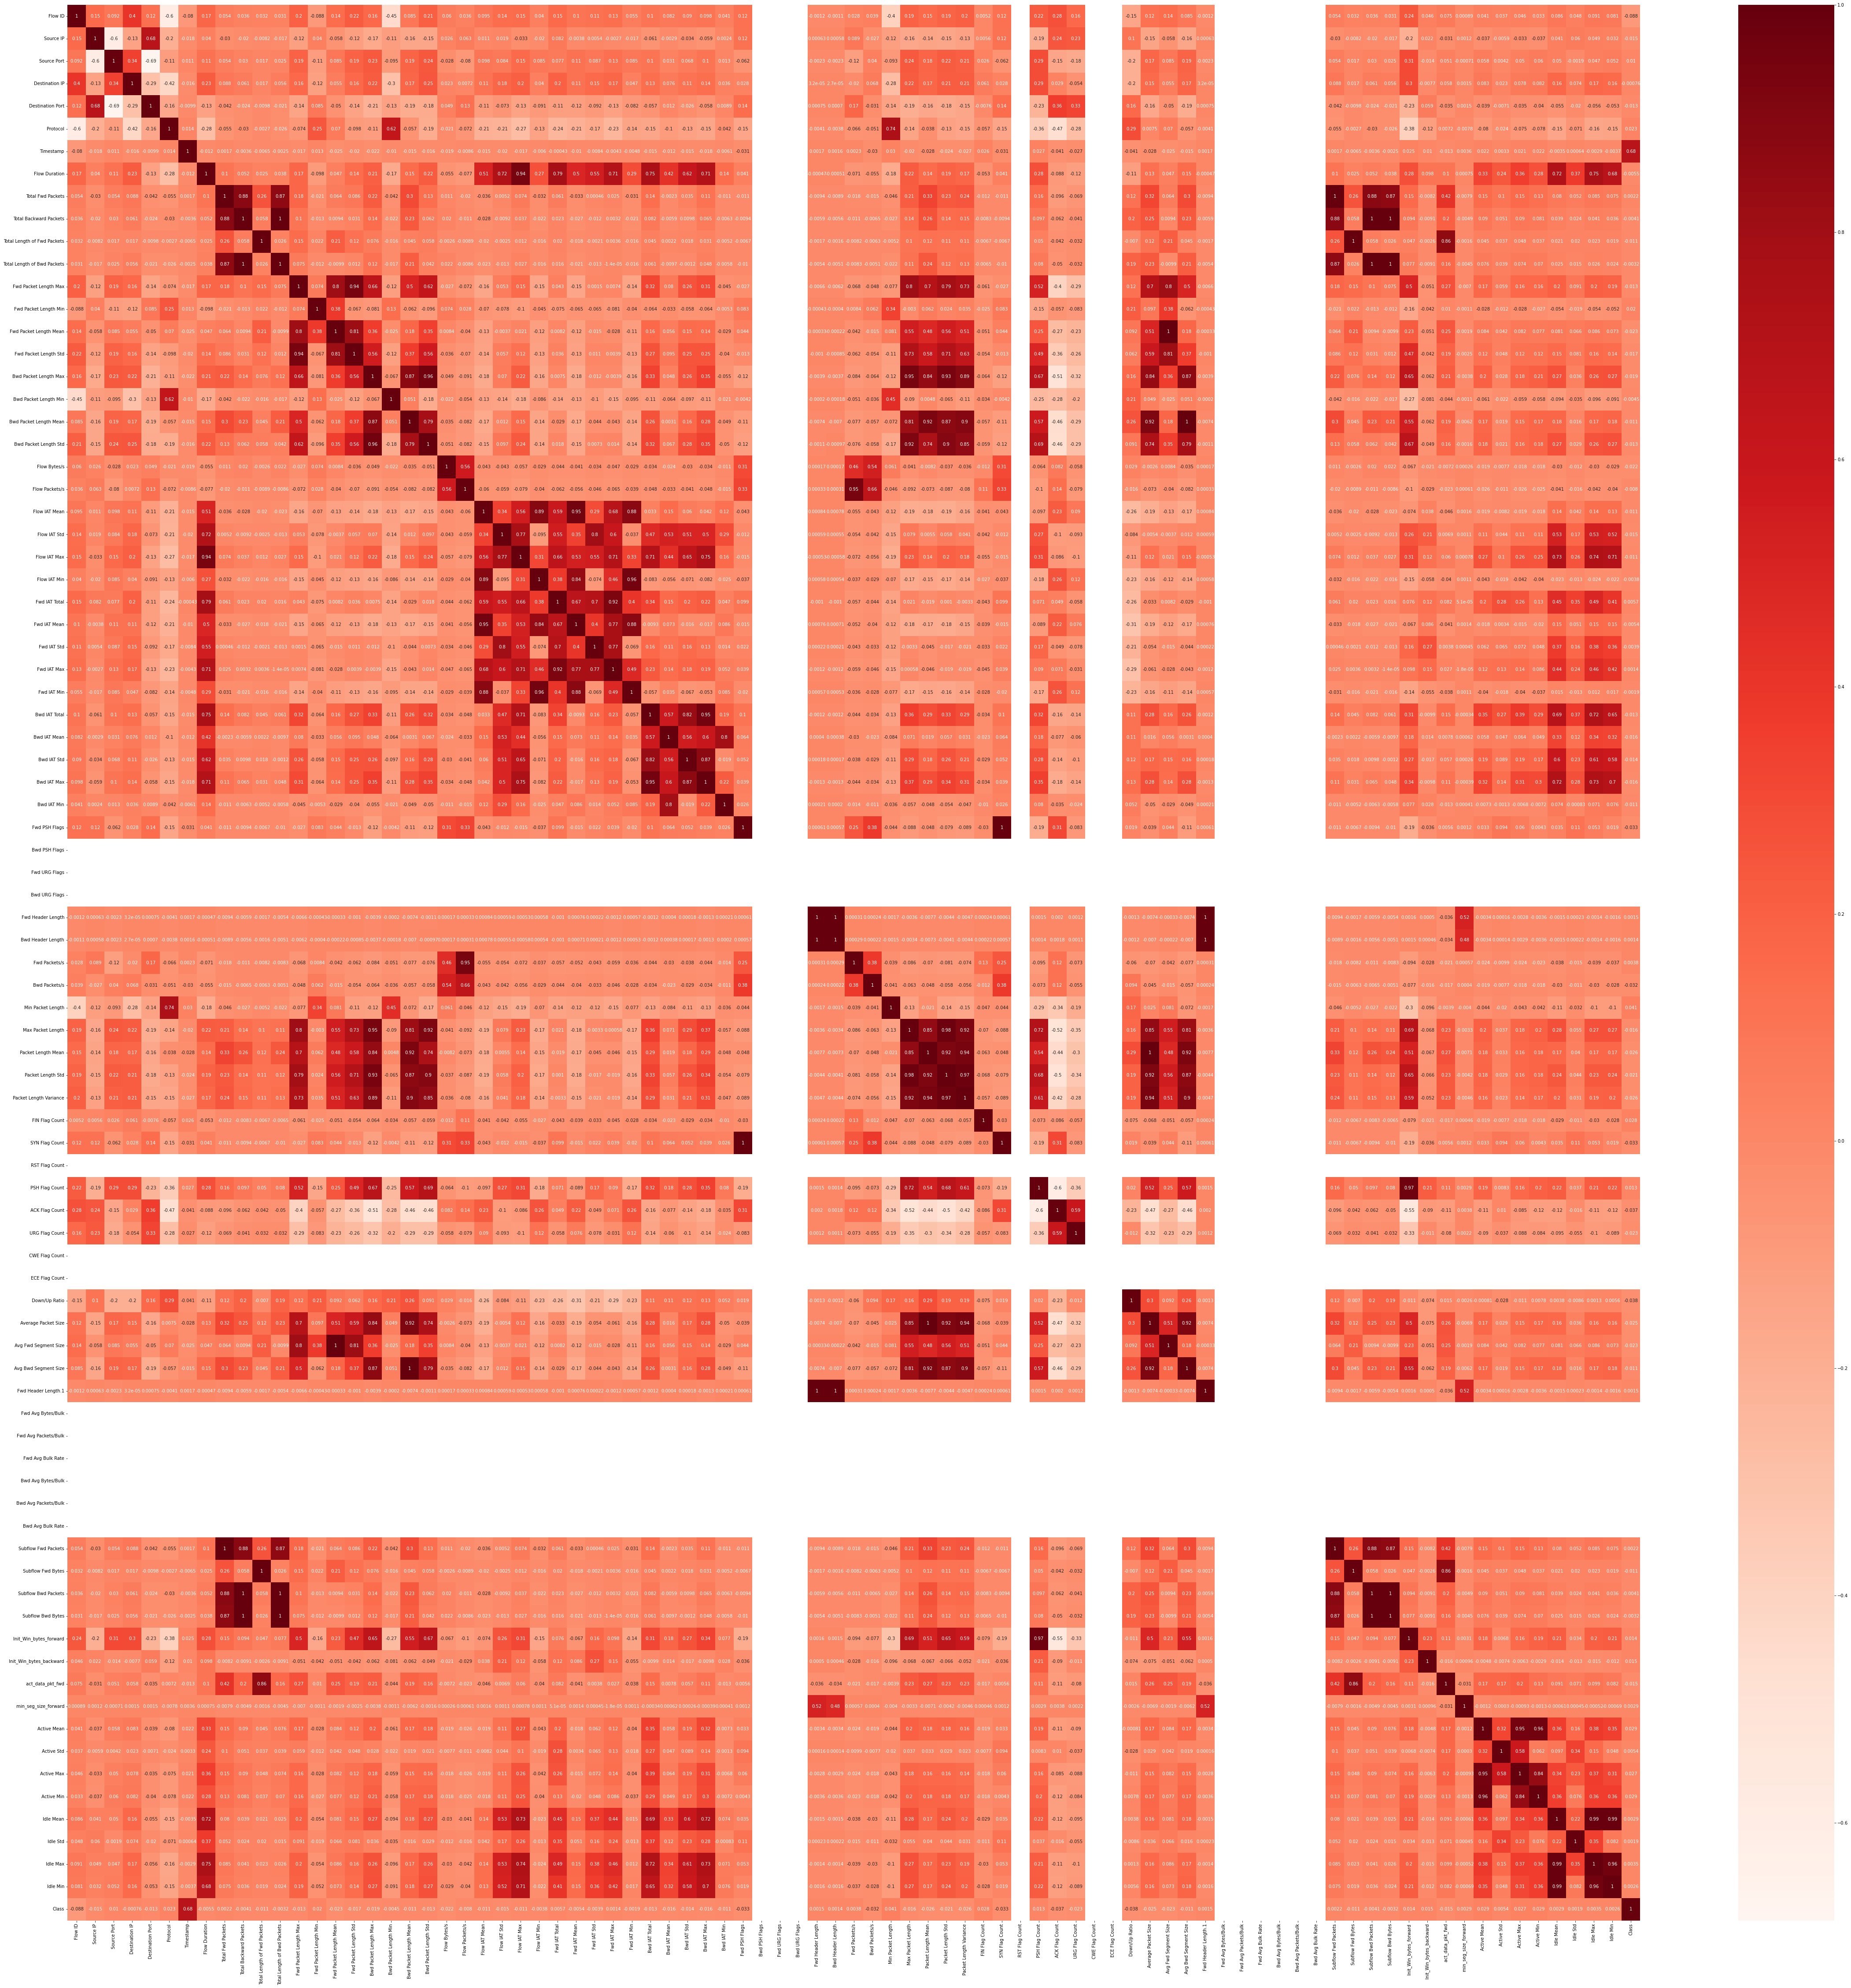

In [22]:
#Using Pearson Correlation
plt.figure(figsize=(80,80))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [48]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(data, 10))

Top Absolute Correlations
 Fwd Header Length            Fwd Header Length.1           1.000000
Fwd PSH Flags                 SYN Flag Count                1.000000
Total Fwd Packets            Subflow Fwd Packets            1.000000
 Fwd Packet Length Mean       Avg Fwd Segment Size          1.000000
Total Length of Fwd Packets   Subflow Fwd Bytes             1.000000
Total Backward Packets        Subflow Bwd Packets           1.000000
Total Length of Bwd Packets   Subflow Bwd Bytes             1.000000
 Bwd Packet Length Mean       Avg Bwd Segment Size          1.000000
Total Length of Bwd Packets   Subflow Bwd Packets           0.998575
Total Backward Packets       Total Length of Bwd Packets    0.998575
dtype: float64


In [ ]:
corr = data.drop(columns=["Class"]).corr()
corr_top = corr.abs().unstack().sort_values(kind='quicksort')
corr_top = corr_top[corr_top > 0.7][corr_top < 1]

cols_to_drop = [corr_top.index[i][0] for i in range(0, len(corr_top), 2)]
print(f"Highly correlated features: {cols_to_drop}")
data = data.drop(columns=cols_to_drop)
 

In [23]:
data.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Total Length of Fwd Packets,Fwd Packet Length Min,Fwd Packet Length Mean,...,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Active Std,Idle Std,Class
0,116845,617,443,10,35084,6,8845,0.0,0.0,0.000000,...,0,0,0,0,349,1548,32,0.0,0.0,0
1,142840,987,443,8,36459,6,44390,258.0,0.0,129.000000,...,0,0,0,0,15544,0,20,0.0,0.0,4
2,128491,4,38105,1392,443,6,51906,0.0,0.0,0.000000,...,0,0,0,0,2138,-1,32,0.0,0.0,4
3,91744,3,33915,481,443,6,33070,53.0,0.0,17.666667,...,0,0,0,0,65535,-1,20,0.0,0.0,0
4,112784,573,443,7,38069,6,38950,0.0,0.0,0.000000,...,0,0,0,0,357,1724,32,0.0,0.0,1


### Test train Split and classification

In [24]:
x = data.drop("Class", axis = 1) # axis = 1 removes column and axis = 0 removes row from dataset
y = data["Class"]
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,test_size = 0.2)

In [25]:
# Function to calculate accuracy, classification report and print along with confusion matrix.
def evaluate(model, X_train, X_test, y_train, y_test, algo):
    y_pred = model.predict(X_test)
    prec, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)
    avg_prec = sum(prec)/data["Class"].nunique()
    avg_fscore = sum(fscore)/data["Class"].nunique()
    print(f"ACCURACY SCORE: {accuracy_score(y_test, y_pred):.4f}")
    print(f"PRECISION: {avg_prec:.4f}")
    print(f"F-1 SCORE: {avg_fscore:.4f}")
    clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    clf_report.to_csv('classification_report_{}.csv'.format(algo), index = False)
    print(f"CONFUSION MATRIX:")
    cn = confusion_matrix(y_test, y_pred)
    sns.heatmap(cn, annot = True)

#### Let us see how hyperparameter tuning can be done for a classifier

In [26]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=50, scoring_fit ='accuracy', # 'neg_mean_squared_error'
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [27]:
# Parameter tuning
model = tree.DecisionTreeClassifier(criterion="entropy", random_state = 44)
param_grid = {
    'max_depth': [10, 100, 200],
    'max_leaf_nodes': [100, 1000, 20000]
}

model, pred = algorithm_pipeline(x_train, x_test, y_train, y_test, model, param_grid)

print(model.best_score_)
print(model.best_params_)

Fitting 50 folds for each of 9 candidates, totalling 450 fits
0.99240298578899
{'max_depth': 100, 'max_leaf_nodes': 20000}


ACCURACY SCORE: 0.9928
PRECISION: 0.9839
F-1 SCORE: 0.9838
CLASSIFICATION REPORT:
                 0            1            2            3            4  \
precision      1.0     0.998547     0.997853     0.954319     0.954131   
recall         1.0     0.998547     0.997210     0.962372     0.948691   
f1-score       1.0     0.998547     0.997531     0.958329     0.951403   
support    33587.0  4817.000000  4660.000000  4385.000000  3859.000000   

                     5  accuracy     macro avg  weighted avg  
precision     0.998718  0.992756      0.983928      0.992768  
recall        0.995653  0.992756      0.983746      0.992756  
f1-score      0.997183  0.992756      0.983832      0.992760  
support    3911.000000  0.992756  55219.000000  55219.000000  
CONFUSION MATRIX:


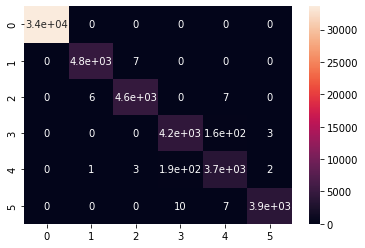

In [28]:
evaluate(model, x_train, x_test, y_train, y_test, "tuning")

### 1. Decision Tree Classifier

ACCURACY SCORE: 0.9928
PRECISION: 0.9840
F-1 SCORE: 0.9839
CLASSIFICATION REPORT:
                 0            1            2            3            4  \
precision      1.0     0.998547     0.998067     0.952671     0.955567   
recall         1.0     0.998754     0.996996     0.963968     0.947396   
f1-score       1.0     0.998651     0.997531     0.958286     0.951464   
support    33587.0  4817.000000  4660.000000  4385.000000  3859.000000   

                     5  accuracy     macro avg  weighted avg  
precision     0.999230  0.992774      0.984014      0.992792  
recall        0.995398  0.992774      0.983752      0.992774  
f1-score      0.997310  0.992774      0.983874      0.992779  
support    3911.000000  0.992774  55219.000000  55219.000000  
CONFUSION MATRIX:


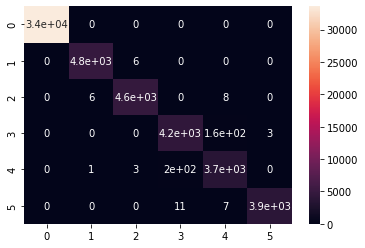

In [29]:
cf = tree.DecisionTreeClassifier(criterion="entropy")
cf.fit(x_train, y_train)
y_pred = cf.predict(x_test)
evaluate(cf, x_train, x_test, y_train, y_test, "dt")

### Decision Tree with Bagging

ACCURACY SCORE: 0.9949
PRECISION: 0.9888
F-1 SCORE: 0.9887
CLASSIFICATION REPORT:
                 0            1            2            3            4  \
precision      1.0     0.998755     0.998067     0.968516     0.968077   
recall         1.0     0.998962     0.997210     0.975143     0.966572   
f1-score       1.0     0.998858     0.997638     0.971818     0.967324   
support    33587.0  4817.000000  4660.000000  4385.000000  3859.000000   

                     5  accuracy     macro avg  weighted avg  
precision     0.999229  0.994929      0.988774      0.994943  
recall        0.993863  0.994929      0.988625      0.994929  
f1-score      0.996539  0.994929      0.988696      0.994934  
support    3911.000000  0.994929  55219.000000  55219.000000  
CONFUSION MATRIX:


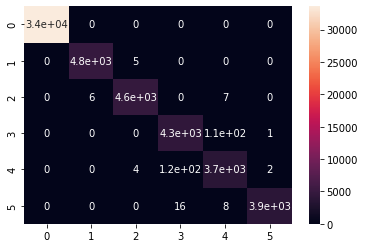

In [30]:
dtree = tree.DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=dtree, n_estimators=400, random_state=42)
bagging_clf.fit(x_train, y_train)
y_pred = bagging_clf.predict(x_test)
evaluate(bagging_clf, x_train, x_test, y_train, y_test,"dtBagging")


### 2. XGBoost Classifier

ACCURACY SCORE: 0.9940
PRECISION: 0.9868
F-1 SCORE: 0.9866
CLASSIFICATION REPORT:
                 0            1            2            3            4  \
precision      1.0     0.999377     0.997428     0.959487     0.965400   
recall         1.0     0.998339     0.998712     0.972178     0.954392   
f1-score       1.0     0.998858     0.998070     0.965791     0.959864   
support    33587.0  4817.000000  4660.000000  4385.000000  3859.000000   

                     5  accuracy     macro avg  weighted avg  
precision     0.998973  0.994006      0.986777      0.994021  
recall        0.995142  0.994006      0.986461      0.994006  
f1-score      0.997054  0.994006      0.986606      0.994007  
support    3911.000000  0.994006  55219.000000  55219.000000  
CONFUSION MATRIX:


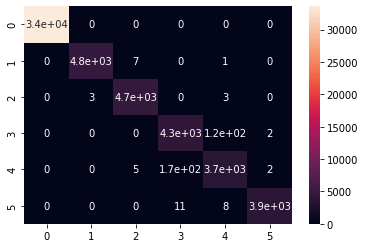

In [31]:
xgb_model = XGBClassifier().fit(x_train, y_train)

# predict
xgb_y_predict = xgb_model.predict(x_test)

# accuracy score
xgb_score =  metrics.accuracy_score(xgb_y_predict, y_test)

evaluate(xgb_model, x_train, x_test, y_train, y_test, "xgb")

### 3. Random Forest

ACCURACY SCORE: 0.9714
PRECISION: 0.9376
F-1 SCORE: 0.9352
CLASSIFICATION REPORT:
                      0            1            2            3            4  \
precision      0.999792     0.996462     0.982003     0.806184     0.847568   
recall         0.999970     0.993980     0.995279     0.885975     0.740606   
f1-score       0.999881     0.995219     0.988596     0.844198     0.790485   
support    33587.000000  4817.000000  4660.000000  4385.000000  3859.000000   

                     5  accuracy     macro avg  weighted avg  
precision     0.993601   0.97135      0.937602      0.971549  
recall        0.992585   0.97135      0.934733      0.971350  
f1-score      0.993093   0.97135      0.935246      0.971045  
support    3911.000000   0.97135  55219.000000  55219.000000  
CONFUSION MATRIX:


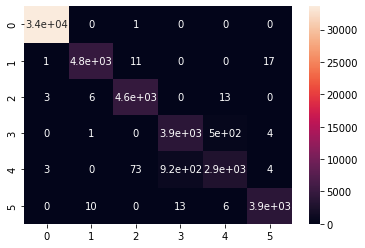

In [32]:
clf = RandomForestClassifier(n_estimators = 10)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(x_train, y_train)

# performing predictions on the test dataset
y_pred = clf.predict(x_test)

evaluate(clf, x_train, x_test, y_train, y_test,"rf")

### 4.  KNN Classifier

ACCURACY SCORE: 0.8017
PRECISION: 0.6753
F-1 SCORE: 0.6398
CLASSIFICATION REPORT:
                      0            1            2            3            4  \
precision      0.888999     0.669121     0.680412     0.573330     0.505603   
recall         0.962158     0.622587     0.637339     0.569669     0.385851   
f1-score       0.924133     0.645016     0.658172     0.571494     0.437684   
support    33587.000000  4817.000000  4660.000000  4385.000000  3859.000000   

                     5  accuracy     macro avg  weighted avg  
precision     0.734093  0.801681      0.675260      0.789382  
recall        0.510355  0.801681      0.614660      0.801681  
f1-score      0.602112  0.801681      0.639768      0.792532  
support    3911.000000  0.801681  55219.000000  55219.000000  
CONFUSION MATRIX:


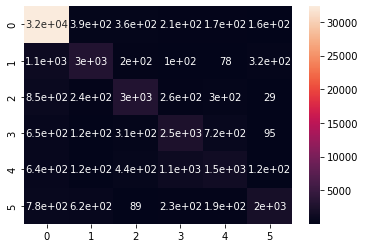

In [33]:
clf = KNeighborsClassifier(n_neighbors=5, metric='braycurtis')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
evaluate(clf, x_train, x_test, y_train, y_test, "knn")


### 5. Adaboost Classifier

Adaboost is for binary 

In [ ]:
# clf = AdaBoostClassifier()

# clf.fit(x_train, y_train)

# # performing predictions on the test dataset
# y_pred = clf.predict(x_test)

# evaluate(clf, x_train, x_test, y_train, y_test)

### Some other approaches that did not perform well.

In [ ]:
# clf = LinearDiscriminantAnalysis()

# clf.fit(x_train, y_train)

# # performing predictions on the test dataset
# y_pred = clf.predict(x_test)

# evaluate(clf, x_train, x_test, y_train, y_test)



In [ ]:
# clf = LogisticRegression()
# clf.fit(x_train, y_train)

# y_pred = clf.predict(x_test)
# print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

In [ ]:
# clf = SVC()
# clf.fit(x_train, y_train)

# y_pred = clf.predict(x_test)
# print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

In [ ]:
# ros = RandomOverSampler(random_state=42)
# x_ros, y_ros = ros.fit_resample(x, y)
# print('Original dataset shape', Counter(y))
# print('Resample dataset shape', Counter(y_ros))

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(x_ros,y_ros,train_size=0.8,test_size = 0.2, random_state=1)

In [ ]:
# xgb_model = XGBClassifier().fit(x_train, y_train)

# # predict
# xgb_y_predict = xgb_model.predict(x_test)

# # accuracy score
# xgb_score =  metrics.accuracy_score(xgb_y_predict, y_test)

# print('Accuracy score is:', xgb_score)

In [ ]:
# cf_gini = tree.DecisionTreeClassifier(criterion="gini")
# cf_gini.fit(x_train, y_train)
# y_pred = cf_gini.predict(x_test)
# print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

In [ ]:
# cn = confusion_matrix(y_test, y_pred)
# sns.heatmap(cn, annot = True)

In [ ]:
# report = classification_report(y_test, y_pred)
# print(report)

In [ ]:
# smote = SMOTE()

# # fit predictor and target variable
# x_smote, y_smote = smote.fit_resample(x, y)

# print('Original dataset shape', Counter(y))
# print('Resample dataset shape', Counter(y_ros))


In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote,train_size=0.9,test_size = 0.1, random_state=1)

In [ ]:
# cf_gini = tree.DecisionTreeClassifier(criterion="gini")
# cf_gini.fit(x_train, y_train)
# y_pred = cf_gini.predict(x_test)
# print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

In [ ]:
# xgb_model = XGBClassifier().fit(x_train, y_train)

# # predict
# xgb_y_predict = xgb_model.predict(x_test)

# # accuracy score
# xgb_score =  metrics.accuracy_score(xgb_y_predict, y_test)

# print('Accuracy score is:', xgb_score)